In [2]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import gym
import numpy as np
from tqdm import trange

In [3]:
def show_state(env, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title(info)
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
def quantization(state):
    p,v,a,av = state
    p = int(p*10) + 100
    v = np.clip(int(v*10),-10,10) + 10
    a = int(a*10) + 100
    av = np.clip(int(a*10),-10,10) + 10
    return p,v,a,av
    

In [4]:
class Agent():
    def __init__(self):
        super(Agent, self).__init__()
        self.q_table = np.zeros((250,50,250,50,2))
        self.eps = 0.9
    def select_action(self,state):
        p,v,a,av = quantization(state)
        max_action = np.argmax(self.q_table[p,v,a,av])
        random_action = np.random.randint(0,2)

        action = np.random.choice([max_action,random_action],p=[1-self.eps,self.eps])
        return action
    
    def eps_decay(self):
        self.eps -= 0.00005
        self.eps = max(self.eps,0.1)
    
    def play_episode(self,env):
        episode = []
        state = env.reset()
        self.eps_decay()
        while True:
#             show_state(env)
            action = self.select_action(state)
            next_state, reward, done, info = env.step(action)

            p,v,a,av = quantization(state)
            n_p,n_v,n_a,n_av= quantization(next_state)
            
            agent.q_table[p,v,a,av, action] += alpha * (reward+ (1-done)*gamma*np.max(agent.q_table[n_p,n_v,n_a,n_av]) - agent.q_table[ p,v,a,av, action])
            
            episode.append([state,reward,done,info])
    
            state = next_state
            if done:
                break
        return episode
    
    def select_best_action(self,state):
        p,v,a,av = quantization(state)
        action = np.argmax(self.q_table[p,v,a,av])
        return action
    
    def play_episode_with_best_policy(self,env):
        state = env.reset()
        ret = 0
        
        while True:
            show_state(env)
            action = self.select_best_action(state)
            next_state, reward, done, info = env.step(action)
            
            ret += reward
            state = next_state
            if done:
                break
        return ret
    

In [5]:
env = gym.make('CartPole-v1') 
agent = Agent()

alpha = 0.05
gamma = 0.99


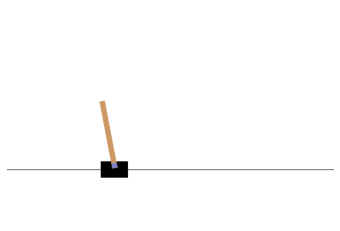

 35%|███▌      | 24657/70000 [03:15<05:58, 126.37it/s] 


KeyboardInterrupt: 

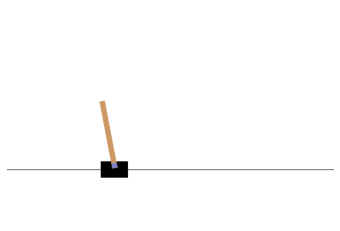

In [8]:
for k in trange(70000):
    agent.play_episode(env)
    
    if k % 10000 == 0:
        agent.play_episode_with_best_policy(env)

KeyboardInterrupt: 

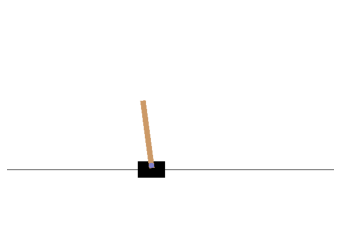

In [9]:
total_ret = 0

for k in range(1000):
    total_ret += agent.play_episode_with_best_policy(env)


In [59]:
total_ret

344.0